# Classification task

In [2]:
# Printing the reports
from tabulate import tabulate

# Loading data 
from pandas import read_csv

# Numerical computing
import numpy as np

# Data preprocessing and decomposition
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA

# Classification task
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Data visualization
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

In [3]:
font = {
    'family': 'arial',
    'size': 14,
    'weight': 'bold'
}

plt.rc('font', **font)

In [4]:
import warnings

warnings.filterwarnings('ignore')

## Implementing Logistics Regression algorithm in Python

We define a set of <u>following functions</u>:

- <u>Definition of matrix $\textbf{X}$</u>. As the value of $x^{(0)}$ is not relevant, datasets often do not include these values. So, first of all we create a new row containing all ones to the independent variables set.
- <u>Generation of initial theta vector</u>. We need to generate a vector that contains the initial values of theta. For the gradient descent algorithm implementation, it needs to start somewhere before optimizing to find the minimum of the loss function.
- <u>Definition of sigmoid function</u>. It will be too expensive if we include the process of calculating the sigmoid function during the gradient descent computation.
- <u>Definition of logistics regression model</u>. We define a function that takes _two matrices_ as its training instance, a _learning rate_, and the _number of iterations_. It reshapes the matrix y to match with the dimension of the target values vector in the gradient vector formula. Then computes the upgraded gradient for each iteration, getting to a new model parameter vector that produces a better performance. Finally, it computes the loss value of each iteration and stores the values.

In [7]:
class Logistic_Regression:
    '''
    Logistic Regression Classifier
    '''
    def __init__(self):
        pass

    def generate_X_matrix(self, X):
        '''
        Taking the original independent variables matrix and add a row of 1 which corresponds to x_0
        -----------
        Parameters:
            X:  independent variables matrix
        -----------
        Return value: the matrix that contains all the values in the dataset (excluded the outcomes variables). 
        '''
        X_matrix = np.c_[np.ones((len(X), 1)), X]
        return X_matrix

    def init_theta(self, X):
        '''
        Generate an initial value of vector theta from the original independent variables matrix
        -----------
        Parameters:
            X:  independent variables matrix
        -----------
        Return value: a vector of theta filled with initial guess
        '''
        theta = np.random.randn(len(X[0])+1, 1)
        return theta

    def sigmoid(self, X):
        '''
        Compute the sigmoid value of the inputs
        -----------
        Parameters:
            X:  values
        -----------
        Return value: the sigmoid value
        '''
        return 1/(1 + np.e**(-X))

    def Logistic_Regression_model(self, X, y, step_size, iterations, report):
        '''
        Find the logistics regression model for the data set and 
        shows loss value over the training data after each 1000 epochs
        -----------
        Parameters:
            X: independent variables matrix
            y: dependent variables matrix
            step_size: learningrate of Gradient Descent
            iterations: the number of iterations
            report: bool, required. If True, shows loss value over the training data after each 1000 epochs,
                    False otherwise
        -----------
        Return value: the final dictionary that contains three key-value pairs: number of 
        iterations, loss values and theta vector. The keys are respectively: 'epochs', 
        'lossvalues' and 'theta'
        '''
        y_new = np.reshape(y, (len(y), 1))
        loss_lst = []
        X_mat = self.generate_X_matrix(X)
        theta = self.init_theta(X)
        m = len(X)

        print('Execution in progress...')

        # headers of report table
        RepoTable = GetReport(report=report)
        RepoTable.headers()

        # gradient computation
        for iteration in range(iterations):
            gradients = 2/m * X_mat.T.dot(self.sigmoid(X_mat.dot(theta)) - y_new)
            # updating of parameters 
            theta = theta - step_size * gradients
            ypred = self.sigmoid(X_mat.dot(theta))
            # loss value
            lossv = -np.sum(
                y_new*np.log(ypred) + ((1-y_new)*np.log(1-ypred))
            ) / (len(ypred))
            loss_lst.append(lossv)

            # records of report table
            RepoTable.records(i=iteration, I=iterations, v=lossv)

        print('\nCompleted!')

        # output of user-defined function
        summary = dict(
            epochs=np.arange(1, iterations), 
            lossvalues=loss_lst[1:],
            theta=theta
        )
                
        return summary

In [8]:
class GetReport:

    def __init__(self, report=False):
        self.report = report

    def headers(self):
        '''
        Prints the headers of report table, if report parameter is True
        -----------
        Parameters: none
        -----------
        Return value: none 
        '''
        if self.report == True:
            
            table = tabulate(
                tabular_data=[['n. epochs', 'loss v']], 
                tablefmt='pipe', colalign=('right', 'left')
            )
            print(f'\n{table}')

    def records(self, i, I, v):
        '''
        Prints the records of report table, if report parameter is True
        -----------
        Parameters: 
            i: single iteration
            I: all iterations
            v: updated loss value
        -----------
        Return value: none 
        '''
        if self.report == True:
            
            if (i + 1) % 1000 == 0:
                  
                table = tabulate([[f'{i + 1}\nof {I}', f'≈     \n{v:.3f}']],
                                tablefmt='pipe',
                                colalign=('right', 'left'))
                
                print(table)

## About dataset

The Banknote Dataset contains 1.372 observations with 4 input variables (continuous):
- variance of wavelet transformed image
- skewness of wavelet transformed image
- kurtosis of wavelet transformed image
- entropy of image;

and 1 output variable (discrete):
- class (0 for authentic, 1 for inauthentic).

Wi will use this dataset to predict whether a given banknote is authentic given a number of measures taken from a photograph.

In [11]:
data = read_csv('input/data_banknote_authentication_dataset.csv')
data.columns = map(str.lower, data.columns)
data.head()

,notes,variance_wt,skewness_wt,curtosis_wt,entropy,class
0,1,3.62160,8.6661,-2.8073,-0.44699,0
1,2,4.54590,8.1674,-2.4586,-1.46210,0
2,3,3.86600,-2.6383,1.9242,0.10645,0
3,4,3.45660,9.5228,-4.0112,-3.59440,0
4,5,0.32924,-4.4552,4.5718,-0.98880,0


We remove `'notes'` column, that contains a sequence used for rows indexing

In [13]:
data.drop(columns=['notes'], inplace=True)
data.head()

,variance_wt,skewness_wt,curtosis_wt,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


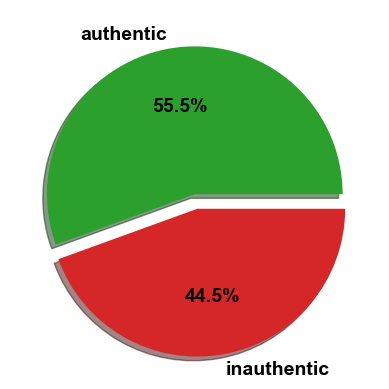

In [14]:
plt.pie(
    data['class'].value_counts(), 
    explode=[0, .1],
    autopct='%1.1f%%',
    shadow=True,
    colors=['tab:green', 'tab:red'],
    labels=['authentic' if c==0 else 'inauthentic' for c in data['class'].unique()]
);

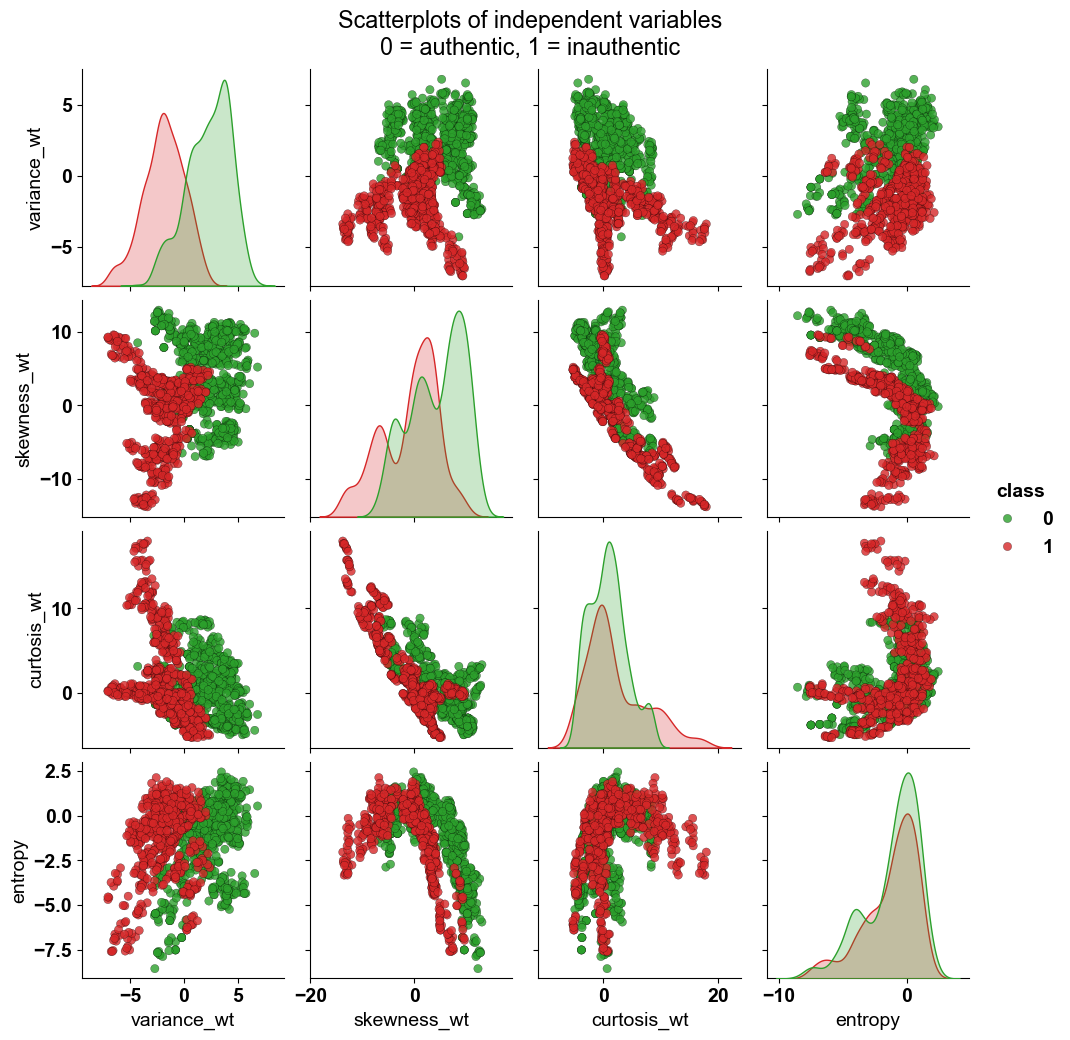

In [15]:
pp = sns.pairplot(
    data=data, 
    vars=data.iloc[:, :4].columns, 
    hue='class', 
    palette=['tab:green', 'tab:red'],
    diag_kind='kde',
    plot_kws=dict(edgecolor='k', lw=.2, alpha=.8)
)

pp.fig.suptitle('Scatterplots of independent variables' + 
                '\n0 = authentic, 1 = inauthentic', y=1.04);

In [16]:
independent_variables, dependent_variable = data.iloc[:, :4], data.loc[:, 'class']

In [17]:
X = np.array(independent_variables, dtype='float16')
y = np.array(dependent_variable, dtype='int')

## Implementing Principal Component Analysis 

We will use the Principal Component Analysis (PCA) to reduce the number of input features while retaining as much of the original information as possible. PCA is a technique for dimensionality reduction that identifies a set of orthogonal axes (principal components) that capture the maximum variance in the data. The principal components are linear combinations of the original variables in the dataset and are ordered in decreasing order of importance.

### Step-By-Step PCA Explanation 

__1.__ Standardization <br />
__2.__ Covariance Matrix Computation <br />
__3.__ Identify the Principal Components

__1.__ Firstall, we standardize the data

$$Z = \frac{X - \mu_X}{\sigma_X}$$

where $\mu_X$ and $\sigma_X$ are the mean and the standard deviation of independent features respectively.

In [23]:
m, s = X.mean(axis=0), X.std(axis=0)
Z = (X - m)/s

__2.__ Now we will compute the covariance matrix (to capture the most dependency between the  features) and right after the eigenvectors and eigenvalues for our feature space which serve to identify the principal components.

$$\Sigma = 
\begin{bmatrix} 
\sigma^{2}_{0} & \sigma_{01} & \cdots & \sigma_{0n} \\ 
\sigma_{10} & \sigma^{2}_{1} & \cdots & \sigma_{1n} \\
\vdots & \vdots & \ddots & \vdots \\
\sigma_{n0} & \sigma_{n1} & \cdots & \sigma^{2}_{n}
\end{bmatrix}$$

where $\Sigma$ is the variance-covariance matrix, a square matrix with diagonal elements that represent the variance and the non-diagonal components that express covariance.

In [25]:
cov_mat = np.cov(Z.T)

__3.__ Compute eigenvalues and eigenvectors of covariance matrix to identify principal components.

Let A be a square $n \times n$ matrix and $X$ be a non-zero vector for which:

$$AX = \lambda X$$

for some scalar values $\lambda$. Then $\lambda$ is known as the eigenvalue of matrix $A$, and $X$ the eigenvector of matrix $A$ for the corresponding eigenvalue. It can also be written as:

$$AX - \lambda X = 0$$
$$(A - \lambda I)X = 0$$

where $I$ is the identity matrix of the same shape of matrix $A$. The above conditions are true only if $(A - \lambda I)$ are non-invertible (i.e. singular matrix). That means:

$$|A - \lambda I|=0$$

From the above equation, we can find the eigenvalues $\lambda$, and therefore corresponding eigenvector can be found using the equation $AX = \lambda X$.

In [27]:
# From the covariance matrix, computes the Eigenvalues and the Eigenvectors
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

Afterwords, we sort the eigenvalues by decreasing order to rank the eigenvectors and cumulate them to figure out how many principal components are we going to use.

In [29]:
tot = sum(eigen_vals)
# explained variance ratio
# = pca.explained_variance_ / np.sum(pca.explained_variance_)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]

cum_var_exp = np.cumsum(var_exp)

In [30]:
# compare my standardization vs standard scaler of sklearn  
scaler = StandardScaler()
XSTDSL = scaler.fit_transform(X)

all([any(np.round(x,3)==np.round(z,3)) for x, z in zip(XSTDSL, Z)])

True

In [31]:
# compare my PCA vs PCA of sklearn 
Pca = PCA().fit(XSTDSL)

print(any([(round(x, 5) == round(y, 5)) for x, y in zip(Pca.explained_variance_ratio_, var_exp)]))

# del scaler, XSTDSL, Pca

True


To determine the number of principal components, we can consider of any threshold value of our choice limiting the variance explained (g.e. at least two-thirds). We're considering an explained variance greater than 87%. 

In [33]:
no_components = np.argmax(cum_var_exp > .87)

print(f'{no_components} principal components')

2 principal components


In [34]:
print(f'''From the output, we observe that 
 \033[1m{100*var_exp[0]:.2f}%\033[0m of the dataset’s variance lies along the 1-st component,
 \033[1m{100*var_exp[1]:.2f}%\033[0m lies along the 2-nd component''')

From the output, we observe that 
 54.49% of the dataset’s variance lies along the 1-st component,
 32.33% lies along the 2-nd component


The first three components explain <strong>≈87%</strong> of the overall variability, while the rest of the components explain smaller quantities that softly vary, which refers that the first three components should be kept.

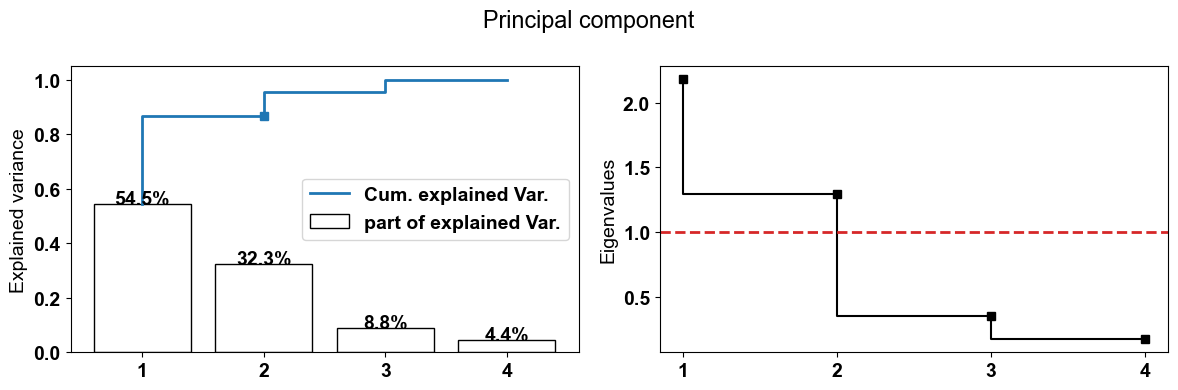

In [36]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

axs[0].bar(range(1, len(var_exp)+1), var_exp, color='w', edgecolor='k', label='part of explained Var.')
axs[0].set_ylabel('Explained variance')
axs[0].set_xticks(range(1, Z.shape[1]+1, 1))

# vertical bars
for i in range(len(var_exp)):
    axs[0].text(i+1, var_exp[i], f'{100*var_exp[i]:.1f}%', ha='center')

axs[0].step(range(1, len(var_exp)+1), cum_var_exp, c='tab:blue', lw=2, label='Cum. explained Var.', where='pre')
axs[0].plot(no_components, cum_var_exp[no_components-1], marker='s', c='tab:blue')
axs[0].set_xticks(range(1, len(var_exp)+1, 1))
axs[0].legend()

axs[1].step(range(1, len(var_exp)+1), sorted(eigen_vals, reverse=True), 'ks-')
axs[1].set_xticks(range(1, len(var_exp)+1, 1))
axs[1].set_ylabel('Eigenvalues')
axs[1].axhline(1, c='tab:red', lw=2, linestyle='--')


plt.suptitle('Principal component')
plt.tight_layout()
plt.show();

In the end, we project the data onto the selected principal components:
- find the projection matrix, that is the matrix of eigenvectors corresponding to the largest eigenvalues of the covariance matrix of the data. It projects the high-dimensional dataset onto a lower-dimensional subspace;
- the eigenvectors of the covariance matrix of the data are referred to as the principal axes of the data, and the projection of the data instances onto these principal axes are called the principal components. 

We will use Sklearn where the entire process of parsing the principal components has been automated by implementing it in a package, and we only need to pass into function the number of principal components.s.

In [38]:
pca = PCA(n_components=no_components)
pca.fit(X)
Z_pca = pca.transform(X)

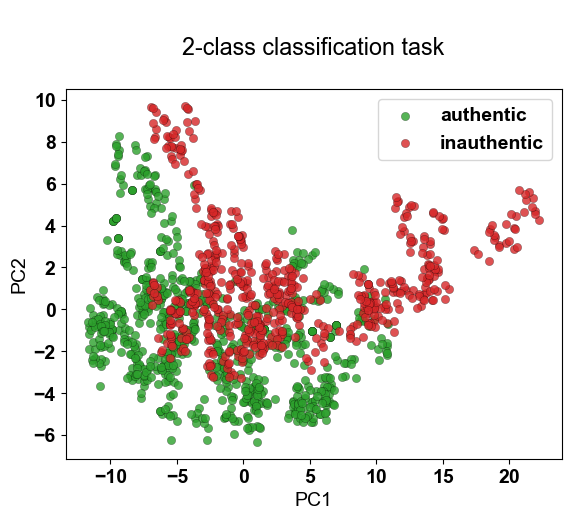

In [39]:
colormap = ListedColormap(['tab:green', 'tab:red'])

Y = np.array(dependent_variable, dtype='int')

plt.title('\n2-class classification task\n')
for index, class_value in enumerate(np.unique(Y)):
    if class_value == 0:
        class_ = 'authentic'
    else:
        class_ = 'inauthentic'
    plt.scatter(Z_pca[Y == class_value, 0], Z_pca[Y == class_value, 1], 
                color=colormap(index), 
                edgecolor='k', lw=.2, alpha=.8, 
                label=class_)

plt.xlabel('PC1')  
plt.ylabel('PC2')  
plt.legend();

We split our dataset into the training set and the test set (i.e. 20%).

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 0)

## With linear features

### Scaling linear features

We standardize the features, applying Feature Scaling, for better convergence of the algorithm. We fit to data (of training set), then transform it, and perform standardization (on testing set) by centering and scaling.

In [45]:
# Standardize features by removing the mean and scaling to unit variance:
# z = (x - u) / s
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

Let’s apply Principal Component Analysis (PCA) to the banknotes dataset. So we will create 2 new features that are a linear combination of the 4 original features. 

In [47]:
# Applying PCA function on training
# and testing set of X component
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

exp_var_ratio = pca.explained_variance_ratio_

print(f'''From the output, we observe that {100*exp_var_ratio[0]:.1f}% of the dataset’s variance 
lies along the first PC and {100*exp_var_ratio[1]:.1f}% lies along the second PC.''')

From the output, we observe that 54.2% of the dataset’s variance 
lies along the first PC and 32.6% lies along the second PC.


### Training the model

Now we can train the model using logistic regression. We use sklearn's Logistic Regression function to train the data. As the data set is not so complicated (small number of instances and features), we choose to add no penalty, in order to not apply regularization for the model. Therefore, set the parameter penalty equal to None.

In [50]:
lin_model = LogisticRegression(random_state=0, penalty=None)
lin_model.fit(X_train_pca, y_train)

LogisticRegression(penalty=None, random_state=0)

### Predictions and evaluating 

In [52]:
y_pred = lin_model.predict(X_test_pca)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79       157
           1       0.72      0.75      0.73       118

    accuracy                           0.77       275
   macro avg       0.76      0.76      0.76       275
weighted avg       0.77      0.77      0.77       275



As follows, the accuracy score produced by the built-in function.

In [54]:
builtin_model = Logistic_Regression()
learning_rate = .001
n_epochs = 100000
LR = builtin_model.Logistic_Regression_model(X=X_train_pca, y=y_train, step_size=learning_rate, iterations=n_epochs, report=True)

Execution in progress...

|----------:|:-------|
| n. epochs | loss v |
|----------:|:-------|
|      1000 | ≈      |
| of 100000 | 0.508  |
|----------:|:-------|
|      2000 | ≈      |
| of 100000 | 0.476  |
|----------:|:-------|
|      3000 | ≈      |
| of 100000 | 0.463  |
|----------:|:-------|
|      4000 | ≈      |
| of 100000 | 0.456  |
|----------:|:-------|
|      5000 | ≈      |
| of 100000 | 0.453  |
|----------:|:-------|
|      6000 | ≈      |
| of 100000 | 0.451  |
|----------:|:-------|
|      7000 | ≈      |
| of 100000 | 0.450  |
|----------:|:-------|
|      8000 | ≈      |
| of 100000 | 0.449  |
|----------:|:-------|
|      9000 | ≈      |
| of 100000 | 0.448  |
|----------:|:-------|
|     10000 | ≈      |
| of 100000 | 0.448  |
|----------:|:-------|
|     11000 | ≈      |
| of 100000 | 0.448  |
|----------:|:-------|
|     12000 | ≈      |
| of 100000 | 0.448  |
|----------:|:-------|
|     13000 | ≈      |
| of 100000 | 0.447  |
|----------:|:-------|
|     14

### Plot the loss function

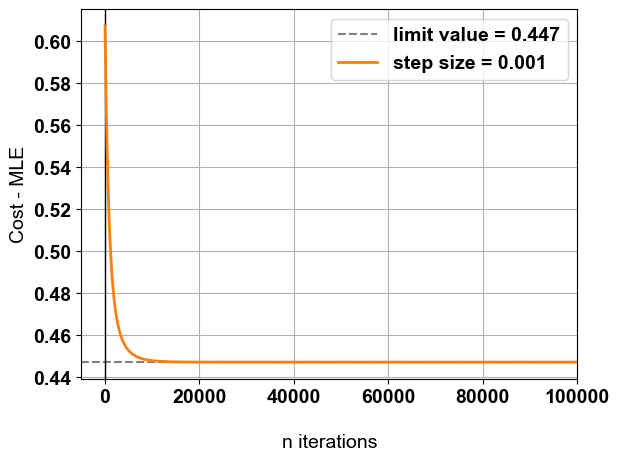

In [56]:
x_values, y_values = LR.get('epochs'), LR.get('lossvalues')
l = min(y_values)

plt.axhline(y=l, color='tab:gray', linestyle='dashed', label=f'limit value = {l:.3f}')
plt.axvline(x=0, color='k', lw=1)
plt.plot(x_values, y_values, color='tab:orange', lw=2, label=f'step size = {learning_rate}')
plt.grid()
plt.xlabel('\nn iterations')
plt.ylabel('Cost - MLE')
plt.xlim(None, n_epochs)
plt.legend();

In [57]:
def column(matrix, i):
    '''
    Returning all the values in a specific columns
    -----------
    Parameters:
        X: the input matrix
        i: the column
    -----------
    Return value: an array with desired column
    '''
    return [row[i] for row in matrix]

def accuracy_LR(X, y, step_size, iterations, X_test, y_test):
    '''
    Returning the accuracy score for a training model
    -----------
    Parameters:
        X: independent variables (training set)
        y: dependent variable (training set)
        step_size: learningrate of Gradient Descent
        iterations: the number of iterations
        report: bool, required. If True, shows loss value over the training data after each 1000 epochs,
                False otherwise
    -----------
    Return value: a scalar representing the accuracy score
    '''
    # Built-in method implementation
    model = Logistic_Regression()
    ideal = model.Logistic_Regression_model(X_train_pca, y_train, step_size, iterations, report=False)
    
    # theta values
    ideal = ideal.get('theta')
    hypo_line = ideal[0]
    for i in range(1, len(ideal)):
        hypo_line = hypo_line + ideal[i]*column(X_test, i-1)

    # Logistic function implementation to outcome the predictions: it predicts it 
    # as the positive class if the function will produces a prob greater than 0.5
    # as the positive class otherwise
    logistic_function = model.sigmoid(hypo_line)
    for i in range(len(logistic_function)):
        if logistic_function[i] >= 0.5:
            logistic_function[i] = 1
        else:
            logistic_function[i] = 0
    last1 = np.concatenate(
        (logistic_function.reshape(len(logistic_function), 1), 
         y_test.reshape(len(y_test), 1)), 1
    )

    # accuracy score computation
    count = 0
    for i in range(len(y_test)):
        if last1[i][0] == last1[i][1]:
            count = count+1
    accuracy = count/(len(y_test))
    
    return print(f'accuracy ≈ {accuracy:.2f}')

Let’s first see how our optimization doing

In [59]:
np.set_printoptions(precision=4)

print(
    'comparing theta values\n---------\n',
    f'\bBuilt-in: {np.ndarray.flatten(LR.get('theta'))}', '\n',
    f'\bSk-learn: {np.concatenate([
    lin_model.intercept_,
    np.ndarray.flatten(lin_model.coef_)])}'
)

comparing theta values
---------
Built-in: [-0.2079  0.7886  1.4956] 
Sk-learn: [-0.2077  0.7887  1.4959]


In [60]:
accuracy_LR(
    X=X_train_pca, 
    y=y_train, 
    step_size=learning_rate, 
    iterations=n_epochs, 
    X_test=X_test_pca, 
    y_test=y_test
)

Execution in progress...

Completed!
accuracy ≈ 0.77


### Plot the decision boundary

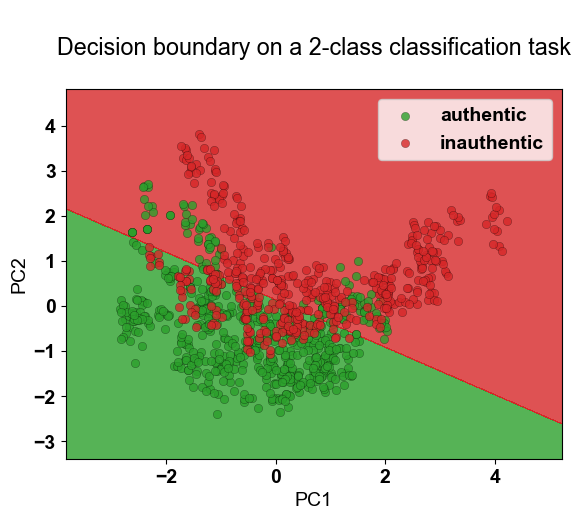

In [62]:
colormap = ListedColormap(['tab:green', 'tab:red'])

X, y = X_train_pca, y_train

# Create a mesh to plot in
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
X1, X2 = np.meshgrid(np.arange(start=x1_min, stop=x1_max, step=.01),
                     np.arange(start=x2_min, stop=x2_max, step=.01))


# Predict the function value for the whole grid
Z = lin_model.predict(np.array([X1.ravel(), X2.ravel()]).T)
Z = Z.reshape(X1.shape)

plt.title('\nDecision boundary on a 2-class classification task\n')
plt.contourf(X1, X2, Z, alpha=.8, cmap=colormap)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for index, class_value in enumerate(np.unique(y)):
    if class_value == 0:
        class_ = 'authentic'
    else:
        class_ = 'inauthentic'
    plt.scatter(X[y == class_value, 0], X[y == class_value, 1], 
                color=colormap(index), 
                edgecolor='k', lw=.2, alpha=.8, 
                label=class_)

plt.xlabel('PC1')  
plt.ylabel('PC2')  
plt.legend();

## With polynomial features

### Transforming polynomial features

In [65]:
deg = 2
poly= PolynomialFeatures(degree=deg, interaction_only=False, include_bias=False)

X_train_poly = poly.fit_transform(X_train_pca)
X_test_poly = poly.transform(X_test_pca)

### Training the model

In [67]:
poly_model = LogisticRegression()
poly_model.fit(X_train_poly, y_train)

LogisticRegression()

### Predictions and evaluating 

In [69]:
y_pred_poly = poly_model.predict(X_test_poly)
print(classification_report(y_test, y_pred_poly))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81       157
           1       0.74      0.76      0.75       118

    accuracy                           0.78       275
   macro avg       0.78      0.78      0.78       275
weighted avg       0.78      0.78      0.78       275



### Plot the decision boundary

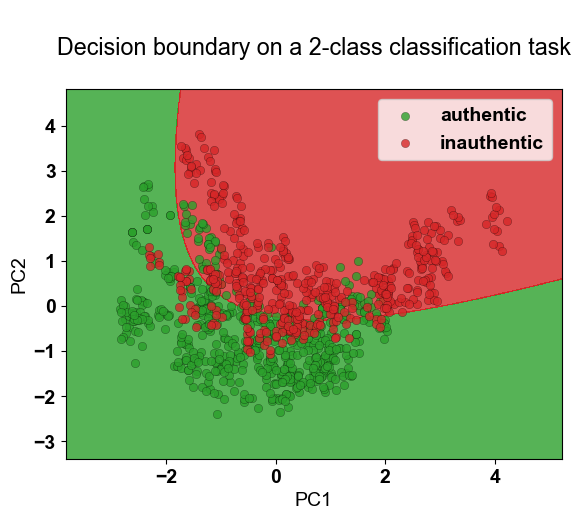

In [71]:
colormap = ListedColormap(['tab:green', 'tab:red'])

X, y = X_train_poly, y_train

# Create a mesh to plot in
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
X1, X2 = np.meshgrid(np.arange(start=x1_min, stop=x1_max, step=.01),
                     np.arange(start=x2_min, stop=x2_max, step=.01))
 
# Predict the function value for the whole grid
Z = poly_model.predict(poly.transform(np.c_[X1.ravel(), X2.ravel()]))
Z = Z.reshape(X1.shape)
 
plt.contourf(X1, X2, Z, alpha=.8, cmap=colormap)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for index, class_value in enumerate(np.unique(y)):
    if class_value == 0:
        class_ = 'authentic'
    else:
        class_ = 'inauthentic'
    plt.scatter(X[y == class_value, 0], X[y == class_value, 1],
                color=colormap(index), 
                edgecolor='k', lw=.2, alpha=.8, 
                label=class_)

plt.title('\nDecision boundary on a 2-class classification task\n')
plt.xlabel('PC1')  
plt.ylabel('PC2')  
plt.legend();

In [72]:
class Polynomial:
    '''
    Logistic Regression and Polynomial Classifier
    -----------
    Parameters:
        X_train_set: training set (independent variables) 
        X_test_set: testing set (independent variables)
        y_train_set: training set (dependent variable) 
        y_test_set: testing set (dependent variable)
        deg: (degree) number int that specifies the maximal degree of the polynomial features
    '''
    
    def __init__(self, X_train_set, X_test_set, y_train_set, y_test_set, deg: int):
        self.X_train_set = X_train_set
        self.X_test_set = X_test_set
        self.y_train_set = y_train_set
        self.y_test_set = y_test_set
        self.deg = deg

    def outcomes(self) -> dict:
        '''
        Generate polynomial and interaction features, so fit to data, then transform them. 
        Then, train the model and compute the predictions.
        -----------
        Return value: a dictionary of key-values pairs containing the polynomial features transformation ('X_polynomial_train'), 
        the transformer ('polynomial_constructor'), the model ('model') and the classification metrics.
        '''
        try:
            # Transforming polynomial features
            poly= PolynomialFeatures(degree=self.deg, interaction_only=False, include_bias=False)

            X_train_poly = poly.fit_transform(self.X_train_set)
            X_test_poly = poly.transform(self.X_test_set)
    
            # Training the model
            poly_model = LogisticRegression()
            poly_model.fit(X_train_poly, self.y_train_set)
        
            # Predictions 
            y_pred_poly = poly_model.predict(X_test_poly)
        except ValueError as e:
            print(e)

        try:
            return dict(
                X_polynomial_train=X_train_poly, 
                polynomial_constructor=poly, 
                model=poly_model,
                report=classification_report(self.y_test_set, y_pred_poly)
            )
        except UnboundLocalError as e:
            print(e)
        
    def plot_decision_boundary(self):
        '''
        Plot the decision boundary of a binary classification model with two principal components.
        '''
        try:
            # # print report
            # report = self.outcomes().get('report')
            # print('\033[1mClassification metrics using the Polynomial transformation \n' +
            # f'of {self.deg}-th for both training and testing data\033[0m \n \n{report}')
            
            # Plot the decision boundary
            colormap = ListedColormap(['tab:green', 'tab:red'])
    
            outcomes = self.outcomes()
        
            X, y = outcomes.get('X_polynomial_train'), self.y_train_set
            
            # Create a mesh to plot in
            x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
            x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
            X1, X2 = np.meshgrid(np.arange(start=x1_min, stop=x1_max, step=.01),
                                 np.arange(start=x2_min, stop=x2_max, step=.01))
             
            # Predict the function value for the whole grid
            model, generator = outcomes.get('model'), outcomes.get('polynomial_constructor')
            
            Z = model.predict(generator.transform(np.c_[X1.ravel(), X2.ravel()]))
            Z = Z.reshape(X1.shape)

            plt.contourf(X1, X2, Z, alpha=.8, cmap=colormap)
            plt.xlim(X1.min(), X1.max())
            plt.ylim(X2.min(), X2.max())
            
            for index, class_value in enumerate(np.unique(y)):
                if class_value == 0:
                    class_ = 'authentic'
                else:
                    class_ = 'inauthentic'
                plt.scatter(X[y == class_value, 0], X[y == class_value, 1],
                            color=colormap(index), 
                            edgecolor='k', lw=.2, alpha=.8, 
                            label=class_)
            
            plt.title(f'\nDecision boundary on a 2-class classification task\nusing the Polynomial transformation of {self.deg}-th deg.')
            plt.xlabel('PC1')  
            plt.ylabel('PC2')  
            plt.legend();
        except AttributeError as e:
            print(e)

In [73]:
for n in range(3, 10):
    model = Polynomial(
        X_train_set=X_train_pca,
        X_test_set=X_test_pca,
        y_train_set=y_train,
        y_test_set=y_test,
        deg=n
    )
    report = model.outcomes()['report']
    print(f'''\n\033[1mClassification metrics using the Polynomial transformation 
of {n}-th degree for both training and testing data\033[0m\n 
    {report}
==========================================================''')


Classification metrics using the Polynomial transformation 
of 3-th degree for both training and testing data
 
                  precision    recall  f1-score   support

           0       0.84      0.80      0.82       157
           1       0.75      0.81      0.78       118

    accuracy                           0.80       275
   macro avg       0.80      0.80      0.80       275
weighted avg       0.80      0.80      0.80       275


Classification metrics using the Polynomial transformation 
of 4-th degree for both training and testing data
 
                  precision    recall  f1-score   support

           0       0.83      0.83      0.83       157
           1       0.78      0.78      0.78       118

    accuracy                           0.81       275
   macro avg       0.81      0.81      0.81       275
weighted avg       0.81      0.81      0.81       275


Classification metrics using the Polynomial transformation 
of 5-th degree for both training and testing data
 

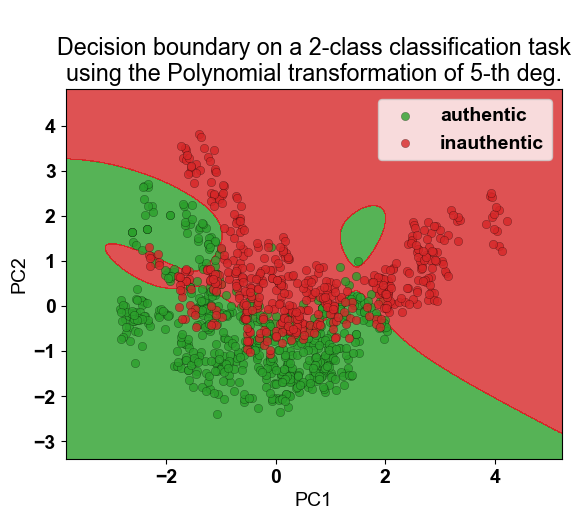

In [74]:
Polynomial(
    X_train_set=X_train_pca,
    X_test_set=X_test_pca,
    y_train_set=y_train,
    y_test_set=y_test,
    deg=5
).plot_decision_boundary()

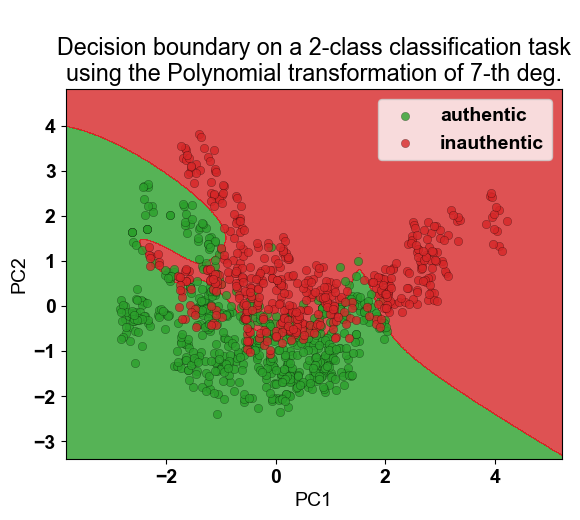

In [75]:
Polynomial(
    X_train_set=X_train_pca,
    X_test_set=X_test_pca,
    y_train_set=y_train,
    y_test_set=y_test,
    deg=7
).plot_decision_boundary()